<a href="https://colab.research.google.com/github/FGalvao77/Deep-Learning-com-PyTorch/blob/main/Deep_Learning_com_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning com PyTorch**

---



## **1. Introdução**

`PyTorch` é uma biblioteca de aprendizado de máquina de código aberto baseada na biblioteca **Torch**, usada para aplicativos como visão computacional e processamento de linguagem natural, desenvolvida principalmente pelo laboratório AI Research do Facebook.

- https://en.wikipedia.org/wiki/PyTorch

O **Pytorch** fornece recursos para computação científica. Inclusive é uma das mais utilizadas para pesquisa científica quando se trata de _deep learning_. E aliás, slogan deles é `“Da pesquisa para produção”`.

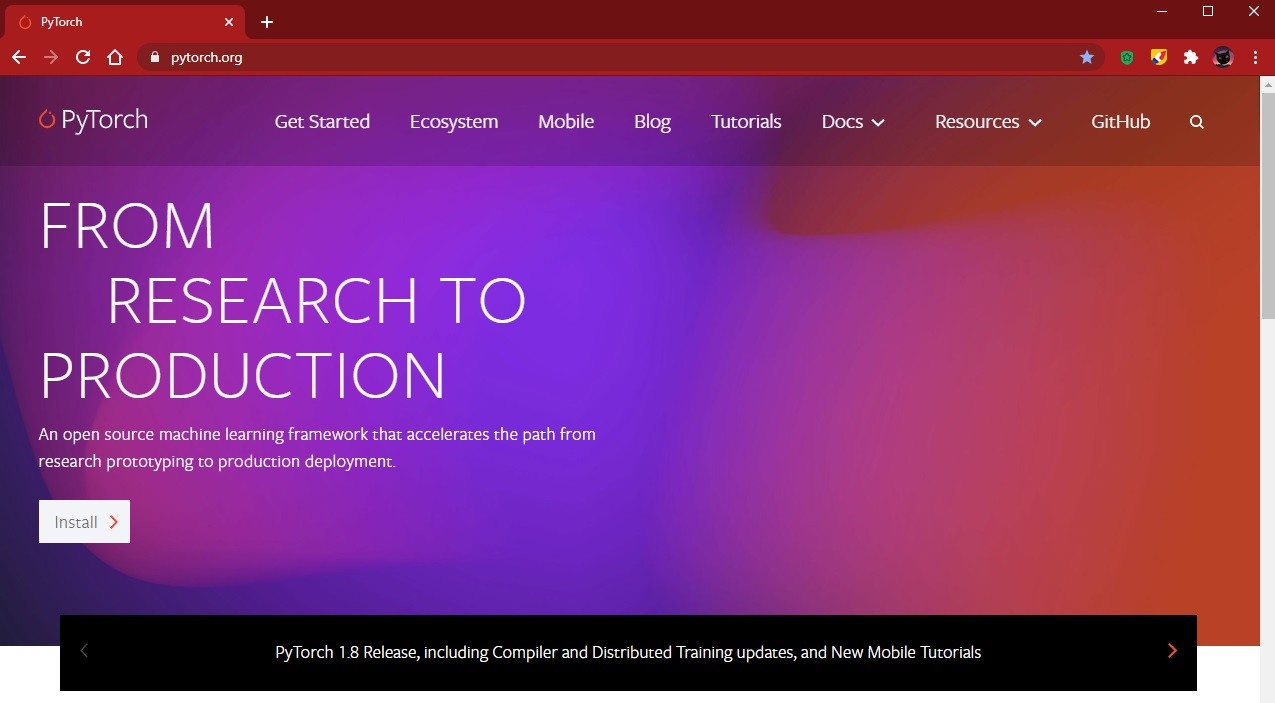

Pytorch é capaz de realizar cálculos utilizando tensores. Tensores podem ser entendidos como vetores _n-dimensionais_. A vantagem dos tensores da Pytorch é que eles podem ser utilizados tanto em **CPUs** quanto em **GPUs** e isso acelera os processos computacionais relacionados ao `deep learning`.

Para entender como a Pytorch é aplicada vamos resolver um problema de classificação em machine learning. A forma mais rápida de começar a utilizar esta biblioteca é através do [Google Colab](https://colab.research.google.com/). Assim como outras bibliotecas de `data science e machine learning` o _Pytorch vem instalada no Colab_ e basta realizar a sua importação no notebook.

**Entendendo o problema!**

**Informações do conjunto de dados:**

O grupo examinado foi formado por grãos pertencentes a três variedades diferentes de trigo: _Kama, Rosa_ e _Canadian_, com **70 elementos cada**, selecionados aleatoriamente para o experimento. A visualização de alta qualidade da estrutura interna do grão foi detectada usando uma técnica de raio-X suave. É não destrutivo e consideravelmente mais barato do que outras técnicas de imagem mais sofisticadas, como microscopia de varredura ou tecnologia a laser. 

As imagens foram gravadas em placas de raios X KODAK de 13x18 cm. Os estudos foram conduzidos usando grãos de trigo colhidos combinados originários de campos experimentais, explorados no `Instituto de Agrofísica da Academia Polonesa de Ciências em Lublin`.

O conjunto de dados pode ser usado para as tarefas de classificação e análise de cluster.

O problema que vamos resolver envolve a classificação de sementes de trigo. A partir de informações como a área e o perímetro, o objetivo é estimar a espécie de uma semente. A versão original da base de dados pode ser baixada neste [link](https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt) e para mais informações no site [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds), já a versão modificada encontra-se neste [link](https://raw.githubusercontent.com/FGalvao77/datasets/main/sementes.csv).

Para fins didáticos, irei demostrar as duas formas de importação do conjunto de dados:
- na primeira demostração irei importar os dados já `"pré-processados"` e no formato `".csv"`, direto do meu repositório do **GitHub**, utilizando uma **url**  e,
- já na segunda, irei importar da **url** do site `UCI Machine Learnig Repository`.
    - este processo já demanda um pouco mais de trabalho, já que o mesmo é um arquivo do tipo `.txt` e as colunas não possui _cabeçalho_.

Vamos pra prática!

## **2. Aplicação do PyTorch**

### **2.1. Primeira forma de importação dos dados**

In [1]:
# importando a biblioteca
import pandas as pd

In [2]:
# carregando o conjunto de dados da url
url = 'https://raw.githubusercontent.com/FGalvao77/datasets/main/sementes.csv'

In [3]:
# instanciando o conjunto de dados na variável "dados"
dados = pd.read_csv(url)

In [4]:
# visualizando as 5 primeiras linhas
dados.head()

,Área,Perímetro,Compacidade,Comprimento,Largura,Assimetria,Comprimento do sulco,Espécie
0,15.26,14.84,871.000,5.763,3.312,2.221,5.220,0
1,14.88,14.57,8.811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,905.000,5.291,3.337,2.699,4.825,0
3,13.84,13.94,8.955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,9.034,5.658,3.562,1.355,5.175,0


### **2.2. Segunda forma de importação dos dados**

In [42]:
# instanciando a url e definindo seu path como "DATA"
DATA = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt'

In [43]:
# instanciando uma lista com o nome das colunas
cols_names = ['area', 'perimetro', 'compacidade', 'comprimento', 'largura', 
              'coeficiente_assimetria', 'comprimento_sulco', 'classe']

> `Talvez pergunte-se, afinal da onde ele tirou o nome das colunas?`

Consultando a documentação do conjunto de dados do site [ UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds).

_Lembre-se que, uma das habilidades de cientista de dados é saber consultar a documentação e interpreta-la, seja de um dataset ou de uma library qualquer._

**Fica aí dica!!!** ; )

**Informação dos atributos:**

Para construir os dados, sete parâmetros geométricos de grãos de trigo foram medidos:
1. área A,
2. perímetro P,
3. compacidade C = 4 * pi * A / P ^ 2,
4. comprimento do grão,
5. largura do grão ,
6. coeficiente de assimetria
7. comprimento do sulco do grão.

Todos esses parâmetros são contínuos com valor real.

In [44]:
# instanciando o conjunto de dados na variável "df"  e passando como argumentos:
# o path "DATA", "delimiter='\s+'" e "names=cols_names" - lista do nome das colunas instanciadas acima
seeds = pd.read_csv(DATA, delimiter= '\s+', names=cols_names)

# visualizando o objeto criado
seeds

,area,perimetro,compacidade,comprimento,largura,coeficiente_assimetria,comprimento_sulco,classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


In [45]:
# visualizando as 2 primeiras linhas dos objetos "dados" e "seeds"
display(dados.head(2))
print('')
display(seeds.head(2))

,Área,Perímetro,Compacidade,Comprimento,Largura,Assimetria,Comprimento do sulco,Espécie
0,15.26,14.84,871.000,5.763,3.312,2.221,5.220,0
1,14.88,14.57,8.811,5.554,3.333,1.018,4.956,0


,area,perimetro,compacidade,comprimento,largura,coeficiente_assimetria,comprimento_sulco,classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1


> Perceba o detalhe da terceira coluna de ambas variáveis. Os dados está "diferente". 

_Por que será?_

Na própria doecumentação ela fornece a resposta!

Isso é devido a seguinte cálculo:
    
    compactness C = 4*pi*A/P^2

Onde foi calculado o coefieciente da compacidade do grão.

**Compacidade (c)**: é a relação entre o volume total ocupado pelos grãos e o volume total do agregado. 

- _Compacidade: índice utilizado para determinar o grau de compactação de um material granular, não coesivo, como grãos, areias e etc._

Vamos pegar a primeira linha e dados da área e perímetro e realizar o cálculo com a fórmula. E ver se realmente as informações procede!

```python
    area	 perimetro	compacidade ...
0   15.26	14.84	    0.8710      


In [201]:
# importando a biblioteca para operações mátemáticas
import math

In [202]:
# visualizando o valor de PI
math.pi

3.141592653589793

In [206]:
# realizando o cálculo de C = 4*pi*A/P^2
c = (4 * 3.141592653589793 * 15.26) / (14.84 ** 2)
round(c, 3)

0.871

In [10]:
# visualizando o tipo de dado das colunas
dados.dtypes

Área                    float64
Perímetro               float64
Compacidade             float64
Comprimento             float64
Largura                 float64
Assimetria              float64
Comprimento do sulco    float64
Espécie                   int64
dtype: object

In [207]:
# visualizando o tipo de dado das colunas
seeds.dtypes

area                      float64
perimetro                 float64
compacidade               float64
comprimento               float64
largura                   float64
coeficiente_assimetria    float64
comprimento_sulco         float64
classe                      int64
dtype: object

## **3. Utilizando a primeira base de dados importada**

**Agora vamos para aplicação da resolução do problema.**

- irei realizar aplicação dos métodos com os dois conjuntos de dados.

E posteriormente avaliar se terá algumas implicações na solução do problema

O objetivo do nosso modelo de machine learning é aprender com os dados. Quando passarmos novos valores de Área, Perímetro, Compacidade e etc e, o algoritmo será capaz de retornar um valor da Espécie (classe) da semente. 

As colunas que contém as informações de entrada chamaremos de X. Já a coluna que é nosso alvo de identificação chamaremos de y. Podemos separar os dados em X e y através dos comandos abaixo.

In [12]:
# instanciando as variáves explicativas, o X e a resposta (alvo), o y
X = dados.drop(['Espécie'], axis=1).values
y = dados['Espécie'].values

Para dividir os dados em treino e teste vamos usar a biblioteca scikit-learn.

In [13]:
# importando a biblioteca para realizar o particionamento do conjunto de dados
from sklearn.model_selection import train_test_split

In [14]:
# instanciando os dados de treino e teste
# reservarei 20% do total dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=123)

Agora temos 20% dos dados separados para o teste e, os outros 80% para o treino. Essa divisão de valor é de praxe, mas também encontramos divisões em 30 e 70% em teste e treino, respectivamente.

Não existe uma regra muito bem definida para a escolha, mas normalmente é deixada uma porcentagem maior para o treino e menor para o teste. 

In [15]:
# visualizando as dimensão da divisão dos dados em treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((168, 7), (42, 7), (168,), (42,))

In [16]:
# visualizando o tipo de objeto criado
type (X_train)

numpy.ndarray

Agora começaremos à utlizar o `Torch`.

In [17]:
# importando a biblioteca
import torch

In [18]:
# iremos sobrescrevar as variáveis e aplicaremos a função ".FloatTensor()"
# da biblioteca torch para transformar os dados em tensores
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [19]:
# visualizando a dimensão dos dados após a transformação
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([168, 7]),
 torch.Size([42, 7]),
 torch.Size([168]),
 torch.Size([42]))

In [20]:
# visualizando o tipo de objeto após aplicação da transformação
type (X_train)

torch.Tensor

> Veja que objeto agora é um `Tensor`.

Importando o módulo de redes neurais `nn` e o `functional` para que possamos chamar as funções de ativação.

In [21]:
# importando as bibliotecas
import torch.nn as nn
import torch.nn.functional as F

In [23]:
# instanciando uma função de rede neural
class Model(nn.Module):
                        # dados de entrada, 1ª camada escondida, 2ª camada escondida, dados de saída
    def __init__ (self, input_data=7, hidden_layer1=14, hidden_layer2=49, output_data=3):
        super().__init__()
        self.fc1 = nn.Linear(input_data, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_data)

    # propagação da rede
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

> A rede neural possui sete entradas e três saídas (temos somente três classes de grãos). Essas são respectivamente as colunas de X e o número de classes possíveis que temos em y. E também, foram adicionadas duas camadas escondidas, uma com 14 neurônios e outra com 49 neurônios. 

O número de neurônios das camadas escondidas foi escolhido de forma arbitrária. Para criar a estrutura da rede definimos uma classe que dei o nome de `Model`. Dentro dessa classe foi definimos o `init` que vai iniciar toda a estrutura da rede.

> Ainda dentro da classe `Model` definimos a função **forward** que será responsável pela propagação da rede. 

A propagação é o que leva a entrada até a saída. Cada uma das conexões de uma rede como a da figura abaixo de exemplo é ligada através de pesos e a saída de cada camada da rede é feita usando uma função de ativação. Aqui vamos utilizar a função de ativação `ReLU` que retorna sempre valores positivos. 

_A nossa saída da rede é sempre positiva e por este motivo é conveniente utilizar a ReLU._

Na imagem baixo, cada um dos círculos são os neurônios de uma camada. As linhas são definidas por pesos, valores que ligam cada neurônio através de uma multiplicação. As camadas escondidas são as camadas de neurônios intermediárias entre a primeira camada (entrada) e a última camada (saída).

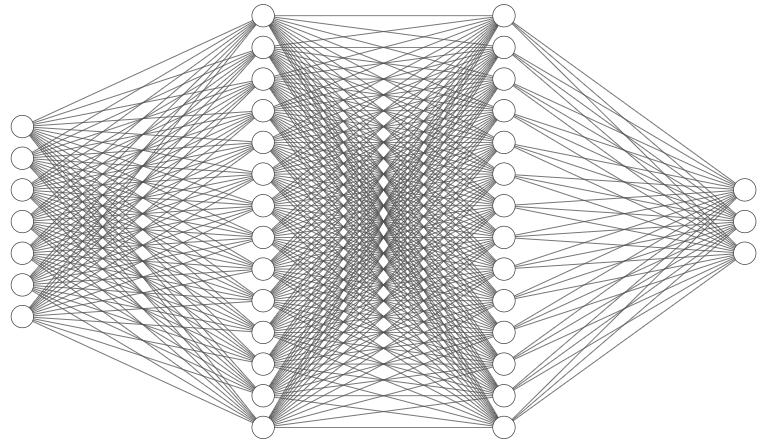

In [25]:
# instanciando o modelo com a função da rede neural
classification_model = Model()

# visualizando os parâmetros da rede neural
classification_model

Model(
  (fc1): Linear(in_features=7, out_features=14, bias=True)
  (fc2): Linear(in_features=14, out_features=49, bias=True)
  (out): Linear(in_features=49, out_features=3, bias=True)
)

Além de definir a rede neural, precisamos verificar se a rede está levando a entrada para um resultado próximo da saída desejada. Nós fazemos isso através de uma função objetivo ou função de custo.

In [26]:
# instanciando a função objetivo e usando a perda de entropia
objective_function = nn.CrossEntropyLoss()
objective_function

CrossEntropyLoss()

Na primeira tentativa, a rede neural não irá obter uma saída satisfatória. Isso acontece porque os pesos que ligam cada um dos neurônios são definidos de forma aleatória. 

Por isso, precisamos fazer a correção desses pesos. O otimizador que será utilizado nesse processo.

In [27]:
# instanciando o otimizador
optimizer = torch.optim.Adam(classification_model.parameters(), 
                             lr=0.01)

# visualizando os parâmetros do otimizador
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

Finalmente vamos treinar a rede neural. O processo de propagação e retropropagação será repetido por 100 épocas. Assim, esperamos corrigir os pesos para obter uma rede que transforma corretamente a entrada em uma previsão da classe da semente.

In [28]:
# treinando o modelo
epochs = 100
losses = []

for i in range(epochs):
    y_predict = classification_model.forward(X_train)
    loss = objective_function(y_predict, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Por fim, podemos tentar prever valores de y passando como entrada o X_teste. Assim temos como comparar o `y (real)` e o `y_pred (predito)` que é o valor estimado. Aqui estão as dez primeiras linhas da minha tabela de resultado. A última coluna da tabela retorna 1 para estimativas corretas e zero para as incorretas.



In [29]:
# realizando as predições
preds = []

with torch.no_grad():
    for val in X_test:
        y_predict = classification_model.forward(val)
        preds.append(y_predict.argmax().item())

Criando um dataframe com as predições do modelo.

In [34]:
# instanciando a classe real VS a classe predita 
df = pd.DataFrame({'y_real': y_test, 'y_pred': preds})

df['correct'] = [1 if corr == pred else 0 for corr, 
                 pred in zip(df['y_real'], df['y_pred'])]

df.head()

,y_real,y_pred,correct
0,2,2,1
1,2,2,1
2,2,2,1
3,1,0,0
4,2,0,0


In [41]:
# visualizando a frequência relativa de acertos - 1 e não-acertos - 0
df['correct'].value_counts(normalize=True)

1    0.809524
0    0.190476
Name: correct, dtype: float64

De forma mais didática, vamos categorizar as respostas da coluna `correct` em **sim** para os acertos e **não** para os erros do modelo.

In [35]:
# instanciando a classe real VS a classe predita 
df2 = pd.DataFrame({'y_real': y_test, 'y_pred': preds})

df2['correct'] = ['sim' if corr == pred else 'não' for corr, 
                 pred in zip(df2['y_real'], df2['y_pred'])]

df2.head()

,y_real,y_pred,correct
0,2,2,sim
1,2,2,sim
2,2,2,sim
3,1,0,não
4,2,0,não


In [98]:
# visualizando a frequência relativa da coluna "correct" - sim e não
df2['correct'].value_counts(normalize=True)

sim    0.809524
não    0.190476
Name: correct, dtype: float64

## **4. Utilizando a segunda base de dados importada**

Aqui realizarei todo processo de forma mais prática e, menos didática.

O passo a passo praticamente é igual o que foi feito anteriormente.

In [132]:
# visualizando os valores únicos presente na coluna "classe"
seeds['classe'].unique()

array([1, 2, 3])

In [133]:
# visualizando o tamanho do conjunto de dados
seeds.shape     # linhas e colunas

(210, 8)

In [134]:
# instanciando as variáves explicativas, o X e a resposta (alvo), o y
X = seeds.drop(['classe'], axis=1).values
y = seeds['classe'].values

In [135]:
# visualizando os 5 primeiros dados da variável alvo
y[:5]

array([1, 1, 1, 1, 1])

In [136]:
# importando a biblioteca para realizar o particionamento do conjunto de dados
from sklearn.model_selection import train_test_split

In [137]:
# instanciando os dados de treino e teste
# reservarei 30% do total dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=123)

In [138]:
# visualizando as dimensão da divisão dos dados em treino e teste
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((147, 7), (63, 7), (147,), (63,))

In [139]:
# importando a biblioteca
import torch

In [140]:
# iremos sobrescrevar as variáveis e aplicaremos a função ".FloatTensor()"
# da biblioteca torch para transformar os dados em tensores
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [141]:
# visualizando a dimensão dos dados após a transformação
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([147, 7]),
 torch.Size([63, 7]),
 torch.Size([147]),
 torch.Size([63]))

In [142]:
y_test

tensor([3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 3, 3, 2, 1, 2, 1, 1, 3, 3, 2, 3, 1, 2,
        3, 1, 2, 3, 2, 3, 3, 1, 3, 3, 3, 3, 1, 2, 2, 1, 1, 3, 3, 2, 3, 3, 3, 3,
        1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 1, 1, 2])

In [143]:
# importando as bibliotecas
import torch.nn as nn
import torch.nn.functional as F

In [144]:
# instanciando uma função de rede neural
class Model(nn.Module):
                        # dados de entrada, 1ª camada escondida, 2ª camada escondida, dados de saída
    def __init__ (self, input_data=7, hidden_layer1=14, hidden_layer2=49, output_data=4):
        super().__init__()
        self.fc1 = nn.Linear(input_data, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output_data)

    # propagação da rede
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [145]:
# instanciando o modelo com a função da rede neural
classification_model = Model()

# visualizando os parâmetros da rede neural
classification_model

Model(
  (fc1): Linear(in_features=7, out_features=14, bias=True)
  (fc2): Linear(in_features=14, out_features=49, bias=True)
  (out): Linear(in_features=49, out_features=4, bias=True)
)

In [146]:
# instanciando a função objetivo e usando a perda de entropia
objective_function = nn.CrossEntropyLoss()
objective_function

CrossEntropyLoss()

In [147]:
# instanciando o otimizador
optimizer = torch.optim.Adam(classification_model.parameters(), 
                             lr=0.01)

# visualizando os parâmetros do otimizador
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [148]:
# treinando o modelo
epochs = 100
losses = []

for i in range(epochs):
    y_predict = classification_model.forward(X_train)
    loss = objective_function(y_predict, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [149]:
# realizando as predições
preds = []

with torch.no_grad():
    for val in X_test:
        y_predict = classification_model.forward(val)
        preds.append(y_predict.argmax().item())

In [150]:
# instanciando a classe real VS a classe predita 
df3 = pd.DataFrame({'y_real': y_test, 'y_pred': preds})

df3['correct'] = [1 if corr == pred else 0 for corr, 
                 pred in zip(df3['y_real'], df3['y_pred'])]

df3.head()

,y_real,y_pred,correct
0,3,3,1
1,3,3,1
2,3,3,1
3,2,1,0
4,3,3,1


In [151]:
# contabilizando as classificações
df3['correct'].value_counts(normalize=True)

1    0.904762
0    0.095238
Name: correct, dtype: float64

In [152]:
df4 = pd.DataFrame({'y_real': y_test, 'y_pred': preds})

df4['correct'] = ['sim' if corr == pred else 'não' for corr, 
                 pred in zip(df4['y_real'], df4['y_pred'])]

df4.head()

,y_real,y_pred,correct
0,3,3,sim
1,3,3,sim
2,3,3,sim
3,2,1,não
4,3,3,sim


In [153]:
# contabilizando as classificações
df4['correct'].value_counts(normalize=True)

sim    0.904762
não    0.095238
Name: correct, dtype: float64

### **4.1. Vamos tentar melhor nosso modelo?**

Instanciarei mais uma camada oculta de neurônios.

In [208]:
# instanciando uma função de rede neural
class Model(nn.Module):
                        # dados de entrada, 1ª camada escondida, 2ª camada escondida, 3ª camada escondida e dados de saída
    def __init__ (self, input_data=7, hidden_layer1=14, hidden_layer2=49, hidden_layer3=125, output_data=4):
        super().__init__()
        self.fc1 = nn.Linear(input_data, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.fc3 = nn.Linear(hidden_layer2, hidden_layer3)
        self.out = nn.Linear(hidden_layer3, output_data)

    # propagação da rede
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [209]:
# instanciando o modelo com a função da rede neural
classification_model = Model()

# visualizando os parâmetros da rede neural
classification_model

Model(
  (fc1): Linear(in_features=7, out_features=14, bias=True)
  (fc2): Linear(in_features=14, out_features=49, bias=True)
  (fc3): Linear(in_features=49, out_features=125, bias=True)
  (out): Linear(in_features=125, out_features=4, bias=True)
)

In [210]:
# instanciando a função objetivo e usando a perda de entropia
objective_function = nn.CrossEntropyLoss()
objective_function

CrossEntropyLoss()

In [211]:
# instanciando o otimizador
optimizer = torch.optim.Adam(classification_model.parameters(), 
                             lr=0.01)

# visualizando os parâmetros do otimizador
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [212]:
# treinando o modelo com 1000 épocas
epochs = 1000
losses = []

for i in range(epochs):
    y_predict = classification_model.forward(X_train)
    loss = objective_function(y_predict, y_train)
    losses.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [213]:
# realizando as predições
preds = []

with torch.no_grad():
    for val in X_test:
        y_predict = classification_model.forward(val)
        preds.append(y_predict.argmax().item())

In [214]:
# instanciando a classe real VS a classe predita 
df5 = pd.DataFrame({'y_real': y_test, 'y_pred': preds})

df5['correct'] = [1 if corr == pred else 0 for corr, 
                 pred in zip(df5['y_real'], df5['y_pred'])]

df5.head()

,y_real,y_pred,correct
0,3,3,1
1,3,3,1
2,3,3,1
3,2,2,1
4,3,3,1


In [215]:
df5['correct'].value_counts(normalize=True)

1    0.888889
0    0.111111
Name: correct, dtype: float64

> Veja que, não houve melhora considerável na performance do modelo mesmo com mais uma camada oculta de neurônios e número de épocas igual a 1000. 

Talvez uma normalização dos dados o modelo apresente uma melhora!